# Sentiment Analysis on Amazon product review data

### Author: Jurat Shayiding (jshayi2@uic.edu)

In [1]:
## load python dependencies
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [3]:
### read product review dataset
data=pd.read_csv("amazon_prod_dataset/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
data.shape
row=data.shape[0]
cols=data.shape[1]
print('dim: ', data.shape)
print("----------------")
print('total rows:', row)
print("----------------")
print('toal columns: ', cols)
print("----------------")
print('columns: \n', data.columns.values)

dim:  (28332, 24)
----------------
total rows: 28332
----------------
toal columns:  24
----------------
columns: 
 ['id' 'dateAdded' 'dateUpdated' 'name' 'asins' 'brand' 'categories'
 'primaryCategories' 'imageURLs' 'keys' 'manufacturer'
 'manufacturerNumber' 'reviews.date' 'reviews.dateSeen'
 'reviews.didPurchase' 'reviews.doRecommend' 'reviews.id'
 'reviews.numHelpful' 'reviews.rating' 'reviews.sourceURLs' 'reviews.text'
 'reviews.title' 'reviews.username' 'sourceURLs']


## data exploration

In [5]:
## keep the columns that needed for performing sentiment analysis

sent_data = data[['reviews.rating', 'reviews.text', 'reviews.title']]
print('explore filtered review data: \n', sent_data.head())
print("==================================================")
print("explore the descriptive statistics: \n",sent_data.info)
print("==================================================")
print("data description: \n", sent_data.describe())
print("explore the descriptive statistics: \n",sent_data.info)
print("==================================================")
print("dimension info: \n", sent_data.shape)

explore filtered review data: 
    reviews.rating                                       reviews.text  \
0               3  I order 3 of them and one of the item is bad q...   
1               4  Bulk is always the less expensive way to go fo...   
2               5  Well they are not Duracell but for the price i...   
3               5  Seem to work as well as name brand batteries a...   
4               5  These batteries are very long lasting the pric...   

                                       reviews.title  
0  ... 3 of them and one of the item is bad quali...  
1  ... always the less expensive way to go for pr...  
2  ... are not Duracell but for the price i am ha...  
3  ... as well as name brand batteries at a much ...  
4  ... batteries are very long lasting the price ...  
explore the descriptive statistics: 
 <bound method DataFrame.info of        reviews.rating                                       reviews.text  \
0                   3  I order 3 of them and one of the ite

In [6]:
### sanity check
print("tot null values in dataset: \n", sent_data.isnull().sum())
print("========================================================")
print("tot na entries in dataset: \n", sent_data.isna().sum())
print("========================================================")

tot null values in dataset: 
 reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64
tot na entries in dataset: 
 reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64


review rating statistics: 
 2      616
1      965
3     1206
4     5648
5    19897
Name: reviews.rating, dtype: int64


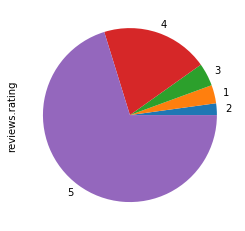

In [152]:
### handly exploratory analysis on product review data
sent_data=sent_data.dropna(how="any")
rev_stats = sent_data['reviews.rating'].value_counts().sort_values()
print("review rating statistics: \n", rev_stats)
print("==================================================")
sent_data['reviews.rating'].value_counts().sort_values().plot.pie()


In [7]:
sent_data = sent_data[sent_data["reviews.rating"].notnull()]
print("data overview: \n", sent_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28332 entries, 0 to 28331
Data columns (total 3 columns):
reviews.rating    28332 non-null int64
reviews.text      28332 non-null object
reviews.title     28332 non-null object
dtypes: int64(1), object(2)
memory usage: 885.4+ KB
data overview: 
 None


In [154]:
### label product review data (positive, or negative)
# sent_data["sentiment_label"]=sent_data["reviews.rating"]>=4
# sent_data["sentiment_label"]=sent_data["sentiment_label"].replace([True, False], ["Positive","Negative"])
# sent_data["sentiment_label"].value_counts().sort_values().plot.pie()

### data preprocessing

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christianrivera/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianrivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### basic sentiment analysis

In [10]:
## helper function to determine sentiment for given review text
## to do so, we can use pre-generated positive / negative english words
neg_words=pd.read_csv("amazon_prod_dataset/negative.csv")
pos_words=pd.read_csv("amazon_prod_dataset/pos.csv")
print("negative english words: \n", neg_words.head())
print("=====================================")
print("positive english words: \n", pos_words.head())

negative english words: 
         words
0     2-faced
1     2-faces
2    abnormal
3     abolish
4  abominable
positive english words: 
        words
0         a+
1     abound
2    abounds
3  abundance
4   abundant


In [157]:
# txt=sent_data["reviews.text"][0]
# tokens= word_tokenize(txt)
# print('text,,\n', txt)
# print("=============")
# print("tokens:\n", tokens)
# print("=============")
# tkens=[''.join(x for x in y if x not in string.punctuation) for y in tokens]
# print("curious: \n", tkens)
# print("=============")
# non_stopwords=[x for x in tkens if x not in stopwords.words("english")]
# print("non stopwords: \n", non_stopwords) 

In [11]:
### helper function to decide sentiment factor in given text
def assign_sentiment(sent):
    neg_cnt=0
    pos_cnt=0
    neu_cnt=0
    tokenized_sent=word_tokenize(sent)
    tokenized_words=[''.join(x for x in y if x not in string.punctuation) for y in tokenized_sent]
    non_stopwords=[x for x in tokenized_words if x not in stopwords.words("english")]
    for word in non_stopwords:
        if word in neg_words:
            neg_cnt+=1
        elif word in pos_words:
            pos_cnt+=1
        else:
            neu_cnt+=1
    if pos_cnt>neg_cnt:
        return +1
    elif neg_cnt>pos_cnt:
        return -1
    else:
        return 0

In [12]:
### print out positive, negative, neutral reviews from original product review data
pos_reviews=0
neg_reviews=0
neu_reviews=0
for review in sent_data['reviews.text']:
    cnt=assign_sentiment(review)
    if cnt==1:
        pos_reviews+=1
    elif cnt==-1:
        neg_reviews+=1
    else:
        neu_reviews+=1

In [14]:
### plot piechart for the sentiment output

plt.pie([pos_reviews, neg_reviews, neu_reviews], labels=["Positive", "Negative", "Neutral"],
       explode=(0, 0.2, 0.2), autopct='%4.1f%%', shadow=True, startangle=60, radius=2, colors=colors)

NameError: name 'colors' is not defined

### Remark

from above plot we can see that porportion of positive, neutral and negative reviews are quite unusal. To get better result, I intend to use feature engineering to train respective machine learning classifier to predict unlabled review data.

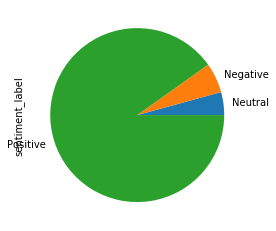

In [17]:
## another way of assigning sentiment label to reviews

def sentiment_labeler(score):
    if (score==5) or (score==4):
        return "Positive"
    elif (score==3):
        return "Neutral"
    else:
        return "Negative"
    
sent_data["sentiment_label"]=sent_data["reviews.rating"].apply(sentiment_labeler)
print("==========================================================")
sent_data["sentiment_label"].value_counts().sort_values().plot.pie()

In [23]:
### data preparing

from sklearn.model_selection import StratifiedShuffleSplit

split_data=StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for tr_indx, ts_indx in split_data.split(sent_data, sent_data["reviews.rating"]):
    train_data=sent_data.reindex(tr_indx)
    test_data=sent_data.reindex(ts_indx)

print("====================================")
print("size of splitted train data: \n", train_data.shape)
print("====================================")
print("size of splitted test data: \n", test_data.shape)

size of splitted train data: 
 (22665, 5)
size of splitted test data: 
 (5667, 5)


#### prepare data

In [24]:
## sanity check
tr_data_stats= train_data["reviews.rating"].value_counts()/len(train_data)

print("sanity check for porportion of diff scale rating: \n", tr_data_stats)

print("=================================================")
ts_data_stats= test_data["reviews.rating"].value_counts()/len(test_data)

print("sanity check for porportion of diff scale rating in training data: \n", tr_data_stats)

sanity check for porportion of diff scale rating: 
 5    0.702272
4    0.199338
3    0.042577
1    0.034061
2    0.021752
Name: reviews.rating, dtype: float64
sanity check for porportion of diff scale rating in training data: 
 5    0.702272
4    0.199338
3    0.042577
1    0.034061
2    0.021752
Name: reviews.rating, dtype: float64


In [25]:
X_train=train_data['reviews.text']
y_train=train_data["sentiment_label"]
X_test=test_data["reviews.text"]
y_test=test_data["sentiment_label"]
print("dim of training data:\n", X_train.shape)
print("================================")
print("dim of testing data:\n", X_test.shape)

dim of training data:
 (22665,)
dim of testing data:
 (5667,)


### Feature Engineering

In [26]:
## feature 1: bag of words
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train=X_train.fillna(' ')
X_test=X_test.fillna(' ')
y_train=y_train.fillna(' ')
y_test=y_test.fillna(' ')

X_train_cnts=CountVectorizer().fit_transform(X_train)
print("dim of bag of words: \n", X_train_cnts.shape)
print("===========================================")
print("===========================================")

Tfidf=TfidfTransformer(use_idf=False)
X_train_tfidf=Tfidf.fit_transform(X_train_cnts)
print("tfidf for X_train", X_train_tfidf)

dim of bag of words: 
 (22665, 9631)
tfidf for X_train   (0, 653)	0.17677669529663687
  (0, 1068)	0.17677669529663687
  (0, 1148)	0.17677669529663687
  (0, 1438)	0.17677669529663687
  (0, 1492)	0.17677669529663687
  (0, 3279)	0.17677669529663687
  (0, 3736)	0.17677669529663687
  (0, 4170)	0.17677669529663687
  (0, 4430)	0.17677669529663687
  (0, 4654)	0.17677669529663687
  (0, 4668)	0.5303300858899106
  (0, 4910)	0.17677669529663687
  (0, 5559)	0.17677669529663687
  (0, 5735)	0.17677669529663687
  (0, 5919)	0.17677669529663687
  (0, 6346)	0.17677669529663687
  (0, 7332)	0.17677669529663687
  (0, 8498)	0.17677669529663687
  (0, 8577)	0.17677669529663687
  (0, 8624)	0.17677669529663687
  (0, 8653)	0.17677669529663687
  (0, 9265)	0.17677669529663687
  (0, 9349)	0.17677669529663687
  (0, 9400)	0.17677669529663687
  (1, 774)	0.31622776601683794
  :	:
  (22663, 4031)	0.2886751345948129
  (22663, 4261)	0.2886751345948129
  (22663, 4654)	0.2886751345948129
  (22663, 4668)	0.2886751345948129
  

In [30]:
## feature 2: chunk parsing
import chunker

ch = chunker.Chunker("Unigram") # Train the chunk tagger

X_train_chunks=X_train.apply(str.split) # Tokenize
X_train_chunks=X_train_chunks.apply(nltk.pos_tag) # POS tag
X_train_chunks=X_train_chunks.apply(ch.parseTree) # Generate parse tree
X_train_chunks=X_train_chunks.apply(chunker.chunkLabels) # Extract chunk labels

chunk_counts = CountVectorizer().fit_transform(X_train_chunks)
chunk_tfidf = Tfidf.fit_transform(chunk_counts)

print("chunk counts: \n", chunk_counts.shape)
print("===========================================")
print("===========================================")
print("TFIDF for chunk counts\n", chunk_tfidf)

chunk counts: 
 (22665, 3)
TFIDF for chunk counts
   (0, 0)	0.8571428571428571
  (0, 1)	0.2857142857142857
  (0, 2)	0.42857142857142855
  (1, 0)	0.9045340337332909
  (1, 1)	0.30151134457776363
  (1, 2)	0.30151134457776363
  (2, 0)	0.847998304005088
  (2, 1)	0.423999152002544
  (2, 2)	0.31799936400190804
  (3, 0)	0.8436958338752907
  (3, 1)	0.44666250028691856
  (3, 2)	0.29777500019127906
  (4, 0)	0.816496580927726
  (4, 1)	0.408248290463863
  (4, 2)	0.408248290463863
  (5, 0)	0.8944271909999159
  (5, 1)	0.4472135954999579
  (6, 0)	0.7071067811865475
  (6, 2)	0.7071067811865475
  (7, 0)	0.8728715609439696
  (7, 1)	0.4364357804719848
  (7, 2)	0.2182178902359924
  (8, 0)	0.8324089477650336
  (8, 1)	0.29966722119541206
  (8, 2)	0.4661490107484188
  :	:
  (22653, 1)	0.2672612419124244
  (22653, 2)	0.5345224838248488
  (22654, 0)	1.0
  (22655, 0)	1.0
  (22656, 0)	0.6359987280038161
  (22656, 1)	0.211999576001272
  (22656, 2)	0.741998516004452
  (22657, 0)	1.0
  (22658, 0)	0.9299811099505543


In [36]:
# feature 3: pos labels

X_train_pos=X_train.apply(str.split) # Tokenize
X_train_pos=X_train_pos.apply(nltk.pos_tag) # POS tag
X_train_pos=X_train_pos.apply(lambda x: [y[1] for y in x]) # Just the tags
X_train_pos=X_train_pos.apply(' '.join) # Concatenate

pos_counts = CountVectorizer().fit_transform(X_train_pos)
pos_tfidf = Tfidf.fit_transform(pos_counts)

print("pos counts: \n", pos_counts.shape)
print("===========================================")
print("===========================================")
print("TFIDF for pos counts\n", pos_tfidf)

pos counts: 
 (22665, 34)
TFIDF for pos counts
   (0, 2)	0.24253562503633297
  (0, 5)	0.36380343755449945
  (0, 6)	0.24253562503633297
  (0, 7)	0.12126781251816648
  (0, 10)	0.24253562503633297
  (0, 11)	0.36380343755449945
  (0, 12)	0.24253562503633297
  (0, 14)	0.12126781251816648
  (0, 17)	0.48507125007266594
  (0, 23)	0.12126781251816648
  (0, 25)	0.36380343755449945
  (0, 26)	0.24253562503633297
  (0, 30)	0.12126781251816648
  (0, 32)	0.12126781251816648
  (1, 2)	0.47140452079103173
  (1, 6)	0.7071067811865476
  (1, 11)	0.23570226039551587
  (1, 12)	0.23570226039551587
  (1, 14)	0.23570226039551587
  (1, 23)	0.23570226039551587
  (1, 29)	0.23570226039551587
  (2, 0)	0.1111111111111111
  (2, 2)	0.3333333333333333
  (2, 5)	0.4444444444444444
  (2, 6)	0.1111111111111111
  :	:
  (22662, 17)	0.21693045781865616
  (22662, 18)	0.32539568672798425
  (22662, 26)	0.21693045781865616
  (22662, 29)	0.10846522890932808
  (22663, 2)	0.25
  (22663, 6)	0.25
  (22663, 11)	0.5
  (22663, 17)	0.25
  

In [216]:
### build machine learning models from extracted bag of words features

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [217]:
## use multinomial NB classifier
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train,y_train)
predicted_nb = clf_multiNB_pipe.predict(X_test)
print("accuracy metrics for training naive bayes classifier:\n",metrics.classification_report(y_test, predicted_nb, target_names = ['1','0','-1']))
print("======================================================================================")

# ## use logistic regression
LR = LogisticRegression()
# text_pipe_LR = Pipeline([('tfidf', TfidfVectorizer()), ('LR', LR)])
clf_logitReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logitReg", LogisticRegression())])
clf_logitReg_pipe.fit(X_train,y_train)
predicted_lr = clf_logitReg_pipe.predict(X_test)
print("accuracy metrics for logistic regression classifier:\n",metrics.classification_report(y_test, predicted_lr, target_names = ['1','0','-1']))
print("======================================================================================")
# ## use SGD classifier
sgd_clf = linear_model.SGDClassifier(max_iter=1000)
clf_sgd_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_SGD", sgd_clf)])
clf_sgd_pipe.fit(X_train,y_train)
predicted_sgd = clf_sgd_pipe.predict(X_test)
print("accuracy metrics for SGD classifier:\n",metrics.classification_report(y_test, predicted_sgd, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use SVC classifier
clf_svc_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_svc", LinearSVC())])
clf_svc_pipe.fit(X_train,y_train)
predicted_svc = clf_svc_pipe.predict(X_test)
print("accuracy metrics for SVC classifier:\n",metrics.classification_report(y_test, predicted_svc, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use decision tree classifier
clf_dt_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_dt", DecisionTreeClassifier())])
clf_dt_pipe.fit(X_train,y_train)
predicted_dt = clf_dt_pipe.predict(X_test)
print("accuracy metrics for decision tree classifier:\n",metrics.classification_report(y_test, predicted_dt, target_names = ['1','0','-1']))

print("======================================================================================")
# ## use random forest classifier
clf_randforest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randforest", RandomForestClassifier())])
clf_randforest_pipe.fit(X_train,y_train)
predicted_randforest = clf_randforest_pipe.predict(X_test)
print("accuracy metrics for random forest classifier:\n",metrics.classification_report(y_test, predicted_randforest, target_names = ['1','0','-1']))

c:\users\jvret\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy metrics for training naive bayes classifier:
               precision    recall  f1-score   support

           1       0.80      0.01      0.02       316
           0       0.00      0.00      0.00       241
          -1       0.90      1.00      0.95      5110

    accuracy                           0.90      5667
   macro avg       0.57      0.34      0.32      5667
weighted avg       0.86      0.90      0.86      5667



c:\users\jvret\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jvret\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy metrics for logistic regression classifier:
               precision    recall  f1-score   support

           1       0.81      0.47      0.59       316
           0       0.64      0.06      0.11       241
          -1       0.93      1.00      0.96      5110

    accuracy                           0.93      5667
   macro avg       0.79      0.51      0.55      5667
weighted avg       0.91      0.93      0.91      5667

accuracy metrics for SGD classifier:
               precision    recall  f1-score   support

           1       0.79      0.48      0.60       316
           0       1.00      0.01      0.02       241
          -1       0.93      1.00      0.96      5110

    accuracy                           0.93      5667
   macro avg       0.91      0.49      0.53      5667
weighted avg       0.93      0.93      0.90      5667

accuracy metrics for SVC classifier:
               precision    recall  f1-score   support

           1       0.80      0.69      0.74       316

c:\users\jvret\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy metrics for random forest classifier:
               precision    recall  f1-score   support

           1       0.88      0.53      0.66       316
           0       0.94      0.49      0.64       241
          -1       0.95      1.00      0.97      5110

    accuracy                           0.95      5667
   macro avg       0.92      0.67      0.76      5667
weighted avg       0.95      0.95      0.94      5667

